# Лабораторная работа №3
## Выполнил : Пелагеев Даниил Иванович Б9122-01.03.02мкт
### Нормальный датасет) Ура

# Информация по датасету:
Это у нас датасет с пшеницой

Признаки: 
- Area — площадь семени.
- Perimeter — периметр семени.
- Compactness — компактность семени (рассчитывается как ￼).
- Length of kernel — длина ядра.
- Width of kernel — ширина ядра.
- Asymmetry coefficient — коэффициент асимметрии.
- Length of kernel groove — длина борозды ядра.

Классы: 
- Kama (Кама).
- Rosa (Роза).
- 3: Canadian (Канадская пшеница).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
data = 'datasets/seeds_dataset.txt'
columns = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class'] # Добавили названия столбцам 

df = pd.read_csv(data, sep='\t', names=columns)
print('Размерность датасета:', df.shape, end='\n\n')
df.head(10)

Размерность датасета: (210, 8)



,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [4]:
df = df.dropna() # Чистим наш датасет от na
print('Размерность датасета после чистки:', df.shape, end='\n\n')
df["Class"] = df["Class"].replace({1: "Kama", 2: "Rosa", 3: "Canadian"}) # Меняем на более удобное(для нас) представление 

Размерность датасета после чистки: (210, 8)



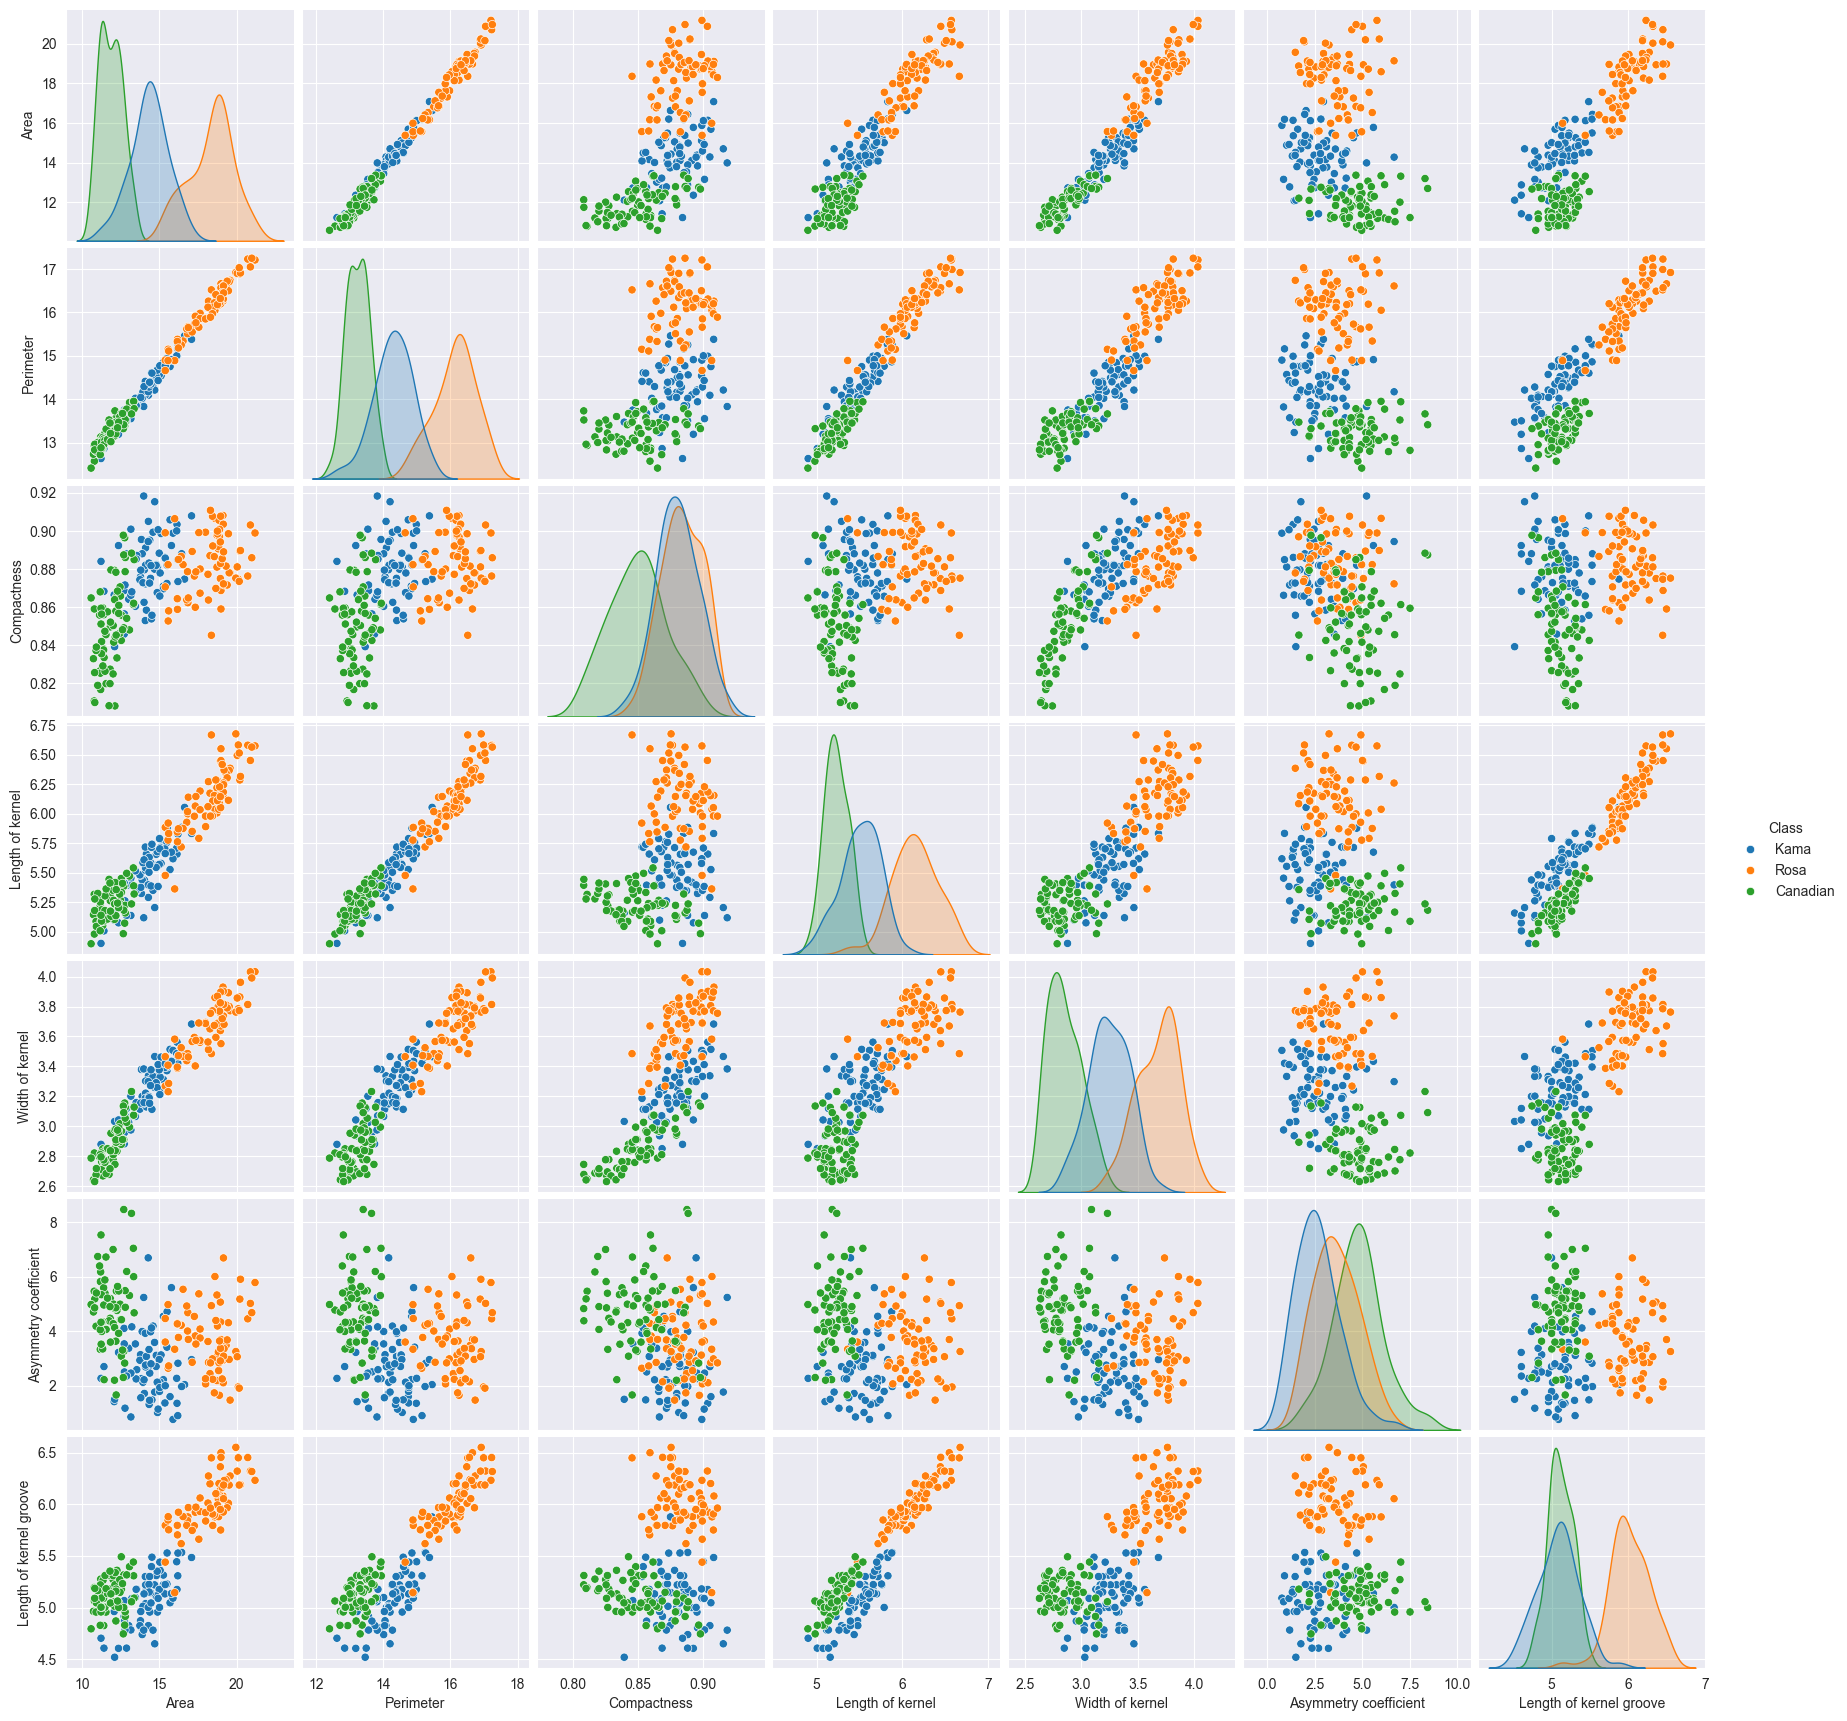

In [5]:
sns.pairplot(df, hue='Class')

Блин, как же круто выглядят графики, просто смотрел графики больных раком легких, а там сполшные столбцы из-за данных в виде: [1, 0, 0, 1, 1, 1]
Если по делу, то этот датасет отлично подходит для кластеризации, даже ничего менять не надо

In [6]:
k_list = list(range(1, 50))

X_train = df.drop('Class', axis=1)
y_train = df['Class']

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k) # Создаем классификатор ля разных k
    knn.fit(X_train, y_train) # Обучаем
    
    X_test = pd.DataFrame([[1.0, 2.5, 2.8, 1.2, 1.9, 0.7, 3.0]], columns=X_train.columns)
    target = knn.predict(X_test)
    print(target)

['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']
['Canadian']


Если играться с переменной `X_text` исходя из того, что видим на графиках. Например, на графиках `Rosa` часто выше всех, и если мы возьмем данные для тестирования высокие, то на каждом шаге будет `Rosa`, если недостаточно высокие, то частично `k` будет влиять на наш `target`

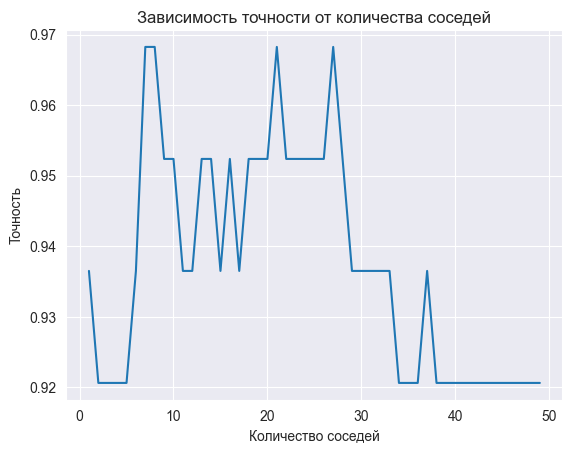

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

accur = []

for k in k_list:
    X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=27)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_holdout)
    accur.append(accuracy_score(y_holdout, knn_pred))


# Построение графика
plt.plot(k_list, accur)

# Добавление подписей к осям
plt.xlabel('Количество соседей')
plt.ylabel('Точность')

# Название графика
plt.title('Зависимость точности от количества соседей')

# Отображение графика
plt.show()
print()

Видно, что наибольшая точность где-то от 5 до 27, но я тут еще поигрался и взял `k = 100` и точность стала ниже, намного ниже

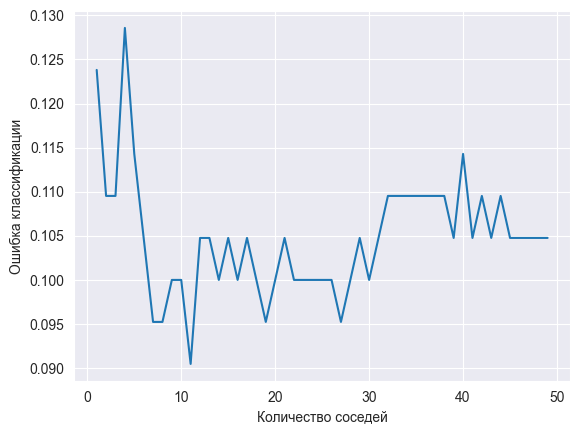

Оптимальные значения K:  11


In [8]:
cv_scores = []

for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей');
plt.ylabel('Ошибка классификации')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', *all_k_min)

Получилась одна точка, это же можно увидеть на графике